## Подключение бибилиотек

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
import math
import random

from scipy.optimize import curve_fit

import sys
sys.path.append('D:\\МФТИ\\Лабы\\PyUtils\\')

import PlotUtilities  as plotu
import LabUtilities   as labu
import LatexUtilities as latexu

In [6]:
from os import listdir
from os.path import isfile, join
import re

## Оценка количества слов

In [11]:
folder = r'..\x64\Debug\tests'

files = listdir(folder)

words = set()

for file in files:
    with open(folder + '\\' + file, 'r') as f:
        
        fileWords = f.read()
        
        repl = "!@#$%^&*()1234567890:\';[]{}\|/?.,<>~`-=_+"
        
        for char in repl:
            fileWords = fileWords.replace(char, ' ')
            
        fileWords = fileWords.replace('"', ' ')

        fileWords = re.split(' |\t|\n', fileWords)
        
        words.update(fileWords)
        #print(len(words))
        
# Shakspear lexicon words - 24489
# Formal words - 68865

print(len(words))
count = 0

for word in words:
    if (len(word) > 16):
        print(word)
        count += 1
        
print(count)

30529
honorificabilitudinitatibus
Anthropophaginian
indistinguishable
undistinguishable
4


## Загрузка данных

In [63]:
files = [#'hash_statistic_list_10.csv',
         'hash_statistic_list_20.csv',
         'hash_statistic_list_100.csv',
         'hash_statistic_list_1500.csv',
         'hash_statistic_list_15000.csv',]

data = []

for file in files:
    _data = pd.read_csv(file, 
                     header = None,
                     usecols = [0,1,2,3,4,5])
        
    data.append(_data)

print(data[0])

        0       1       2       3       4       5
0   hash1   hash2   hash3   hash4   hash5   hash6
1       0    2079       0    1509    5298    1534
2   30538    1082      39    1478     486    1571
3       0    1503     169    1495     243    1525
4       0    1654     860    1522      19    1461
5       0    1272    2590    1536    5456    1537
6       0    1468    3912    1533     519    1556
7       0     854    5234    1486     253    1540
8       0    1273    5557    1502      19    1532
9       0    1249    4707    1516    5411    1529
10      0    1413    3363    1517     491    1502
11      0     758    2100    1538     239    1489
12      0     821    1179    1504      16    1596
13      0    2084     521    1581    5319    1526
14      0     347     219    1548     454    1583
15      0    1233      52    1517     243    1530
16      0    2569      33    1546      21    1545
17      0    1430       3    1496    5274    1479
18      0    2443       0    1616     491    1552


In [64]:
hashFuncCount     = 6
hashFunctionsName = ["Всегда 1", "ASCII-код первого символа", "Длина слова", "Сумма ASCII-кодов букв", "Ror", "CRC-32"]
hashFunctionsNameEn = ["const", "letter", "length", "char_sum", "ror", "crc32"]

rowsCount     = [20, 100, 1500, 15000]
x_major_step  = [ 2,  10,  100,  1000]

In [115]:
# Подсчет пустых списков в таблице
# 0 - 20
# 1 - 100
# 2 - 1500
# 3 - 15000
testNumber = 3

# 0 - всегда 1 
# 1 - ASCII-код первого символа
# 2 - Длина слова
# 3 - Сумма ASCII-кодов букв
# 4 - ror
# 5 - crc32
hashFunction = 0

d =  data[testNumber][hashFunction][1 : rowsCount[testNumber] + 1].astype(int)

average = sum(d) / len(d)

values = [0] * (max(d) + 1)
more_avr = 0
is_null  = 0
less     = 0
sigma    = 0

for st in range(1, rowsCount[testNumber] + 1):
    values[d[st]] += 1
    if (d[st] > average):
        more_avr += 1
    if (d[st] == 0):
        is_null += 1
    if (0 < d[st] <= average):
        less += 1
    sigma += (d[st] - average)**2
    
sigma = (sigma / len(d))**0.5

print('is_null = ', is_null)
print('more_avr = ', more_avr)
print('less = ', less)
print('sigma = ', sigma, 'eps = ', sigma / average * 100)
#print(values)

is_null =  14999
more_avr =  1
less =  0
sigma =  249.33341435434656 eps =  12247.040458822445


In [135]:
for testNumber in range(0, 4):

    print(rowsCount[testNumber])
    for hashFunction in range(0, 6):
        d =  data[testNumber][hashFunction][1 : rowsCount[testNumber] + 1].astype(int)

        average = sum(d) / len(d)
        sigma    = 0

        for st in range(1, rowsCount[testNumber] + 1):
            sigma += (d[st] - average)**2

        sigma = (sigma)**0.5

        print(hashFunctionsNameEn[hashFunction], 'sigma = ', sigma, 'eps = ', sigma / average * 100)
    print('\n\n')

20
const sigma =  29764.760570177616 eps =  1949.3588689617927
letter sigma =  2909.4978604563366 eps =  190.54933921385398
length sigma =  8603.308770467325 eps =  563.4493922632342
char_sum sigma =  147.94526014712332 eps =  9.689256673464099
ror sigma =  9904.429705944709 eps =  648.662630555027
crc32 sigma =  164.40742075709358 eps =  10.767399355366662



100
const sigma =  30384.926354361884 eps =  9949.874371066175
letter sigma =  4860.232665212642 eps =  1591.5360093040285
length sigma =  10550.815113535058 eps =  3454.9790796827097
char_sum sigma =  809.9281202674715 eps =  265.2197656256047
ror sigma =  4432.833130177584 eps =  1451.5793863964846
crc32 sigma =  186.83564970315481 eps =  61.18136410477268



1500
const sigma =  30527.818969544714 eps =  149949.99166388458
letter sigma =  5685.582031536719 eps =  27927.084443333155
length sigma =  10955.531983310473 eps =  53812.62025989164
char_sum sigma =  953.5381677381048 eps =  4683.696547276039
ror sigma =  1170.615665935

In [134]:
print(19 / 20 * 100)

6.333333333333334


## Построение графиков

### Группировка по количеству списков в хеш-таблице

In [ ]:
mpl.rcParams['font.size'] = 16

for testNumber in range(0, 4):
    fig = plt.figure(figsize = (16, 30))

    fig.set_facecolor('white')

    for hashFunc in range(0, hashFuncCount):

        axes = fig.add_subplot(6, 1, hashFunc + 1)

        y = list(data[testNumber][hashFunc][1 : rowsCount[testNumber] + 1].astype(int))

        x = list(range(0, rowsCount[testNumber]))

        axes.set_title(hashFunctionsName[hashFunc])
        axes.set_xlabel("Номер списка")
        axes.set_ylabel("Количество коллизий")

        if (rowsCount[testNumber] > 750):
            axes.plot(x, y)
            axes.fill_between(x, y, [0] * rowsCount[testNumber])
        else:
            axes.bar(x, y)

        x0 = [0,  rowsCount[testNumber]]
        y0 = [30542.0 / rowsCount[testNumber]] * 2

        x_major_ticks = np.arange(0, rowsCount[testNumber]+ 1, x_major_step[testNumber])
        axes.set_xticks(x_major_ticks)

        axes.plot(x0, y0, c = 'red', label ='Среднее')
        axes.legend(loc="upper left")

    fig.suptitle("Количество списков " + str( rowsCount[testNumber]))

    plt.subplots_adjust(left=0.08, bottom=0.05, right=0.95, top=0.95, wspace=0, hspace=0.3)

    plt.show()

    fig.savefig("..\\images\\hash_list_" + str(rowsCount[testNumber]) + ".png")

### Группировка по типу функции

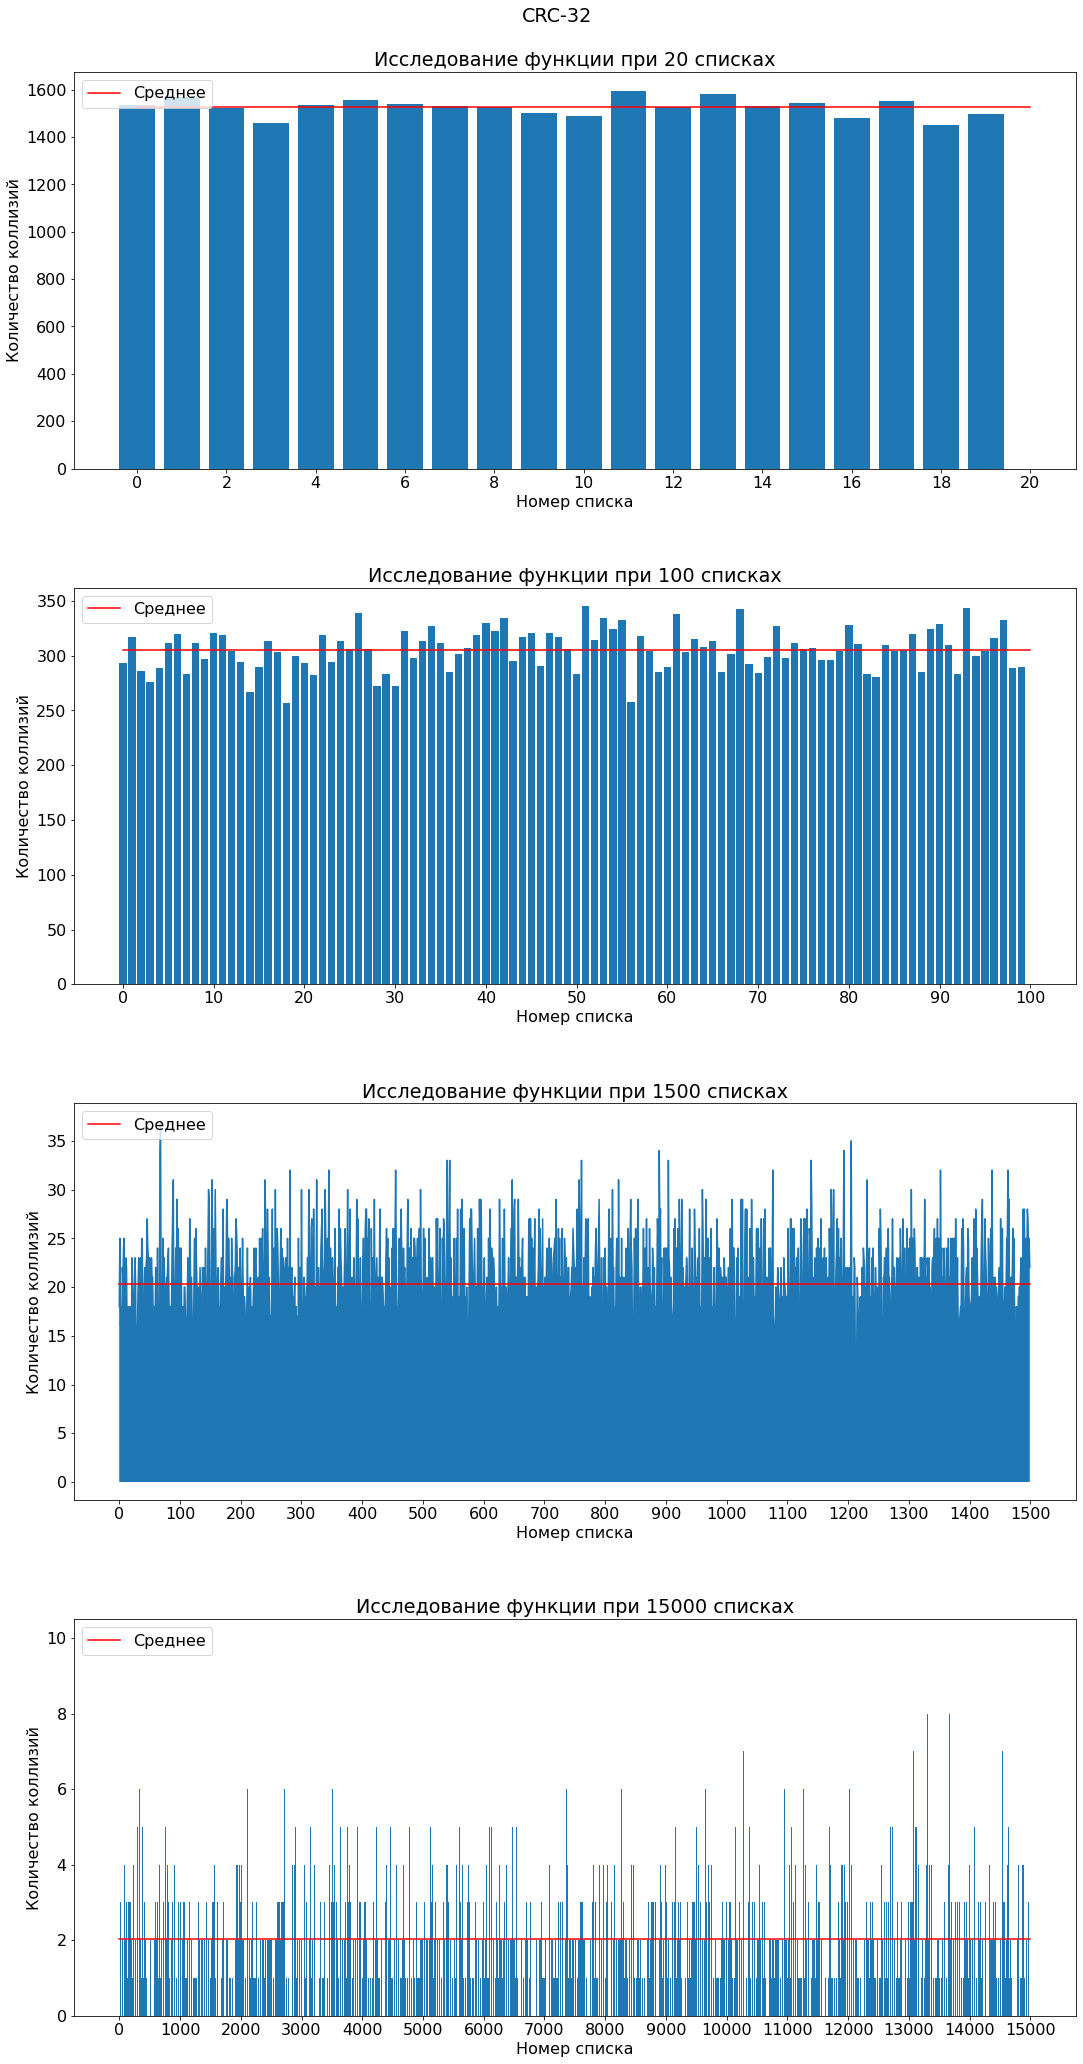

In [106]:
mpl.rcParams['font.size'] = 16

#for hashFuncIndex in range(0, 6):
if (True):
    fig = plt.figure(figsize = (16, 30))

    hashFuncIndex = 5
    
    fig.set_facecolor('white')

    for testIndex in range(0, 4):

        axes = fig.add_subplot(4, 1, testIndex + 1)

        y = list(data[testIndex][hashFuncIndex][1 : rowsCount[testIndex] + 1].astype(int))

        x = list(range(0, rowsCount[testIndex]))
        
        x_smart = []
        y_smart = []
        
        for i in range(0, len(y)):
            y_smart.append(0)
            x_smart.append(x[i] - 0.01)
            
            y_smart.append(y[i])
            x_smart.append(x[i])            
            
            y_smart.append(0)
            x_smart.append(x[i] + 0.01)

        axes.set_title("Исследование функции при {:d} списках".format(rowsCount[testIndex]))
        axes.set_xlabel("Номер списка")
        axes.set_ylabel("Количество коллизий")

        if (rowsCount[testIndex] > 750 and rowsCount[testIndex] < 1600):
            axes.plot(x, y)
            axes.fill_between(x, y, [0] * rowsCount[testIndex])
        else:
            axes.bar(x, y)

        x0 = [0,  rowsCount[testIndex]]
        y0 = [30542.0 / rowsCount[testIndex]] * 2

        x_major_ticks = np.arange(0, rowsCount[testIndex]+ 1, x_major_step[testIndex])
        axes.set_xticks(x_major_ticks)

        axes.plot(x0, y0, c = 'red', label ='Среднее')
        axes.legend(loc="upper left")

    fig.suptitle(hashFunctionsName[hashFuncIndex])

    plt.subplots_adjust(left=0.08, bottom=0.05, right=0.95, top=0.95, wspace=0, hspace=0.3)

    plt.show()

    fig.savefig("..\\images\\hash_" + hashFunctionsNameEn[hashFuncIndex] + ".png")